First, import needed modules

In [290]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups

Initalize variables

In [291]:
shapely.speedups.enable()
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Load shapefile with municipality and state boundaries and plot it for inspection

<AxesSubplot:>

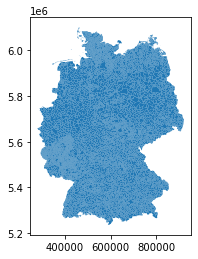

In [292]:
municipalities = gpd.read_file(f'{path}/data/geodata/VG250_GEM.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
municipalities.plot()

Inspect the dataframe: GEN has the municipalities' names, geometry the polygons

In [293]:
municipalities.head()

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,EWZ,DEBKG_ID,geometry
0,6,2,1,083355004002,08335002,083355004002,Allensbach,Gemeinde,64,gemeinschaftsangehörig,...,04,002,R,DE138,083355004002,08335002,2009-01-01,0,DEBKGDL20000HKND,"POLYGON ((507883.567 5282624.777, 507923.277 5..."
1,6,2,1,083355004066,08335066,083355004066,Reichenau,Gemeinde,64,gemeinschaftsangehörig,...,04,066,R,DE138,083355004066,08335066,2009-01-01,0,DEBKGDL20000HKNF,"MULTIPOLYGON (((508095.875 5281959.799, 508134..."
2,6,2,1,083350063063,08335063,083350063063,Radolfzell am Bodensee,Stadt,61,None,...,63,063,R,DE138,083350063063,08335063,2009-01-01,0,DEBKGDL20000HKNE,"POLYGON ((500719.668 5285290.972, 500632.566 5..."
3,6,2,1,010595990186,01059186,010595990186,Steinbergkirche,Gemeinde,64,gemeinschaftsangehörig,...,90,186,R,DEF0C,010595990186,01059186,2013-03-01,0,DEBKGDL20000XYFA,"POLYGON ((547082.162 6075557.922, 547528.602 6..."
4,6,2,1,033595407018,03359018,033595407018,Freiburg (Elbe),Gemeinde,64,gemeinschaftsangehörig,...,07,018,K,DE939,033595407018,03359018,2009-01-01,0,DEBKGDL20000QMG4,"POLYGON ((517934.141 5968832.380, 519053.640 5..."


The data use the European Terrestrial Reference System 1989 as coordinate reference systems (CRS)

In [294]:
municipalities.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Load shapefile with power lines and plot it for inspection, as the CRS of powerlines is EPSG4326 (Degrees), convert to EPSG 25832 (Meters)

In [295]:
powerlines = gpd.read_file(f'{path}/data/geodata/powerlines.shp')
powerlines = powerlines.to_crs(epsg=25832)
powerlines.head()

,# BBPlG 20,Start,End,New,Retro,geometry
0,3,Brunsbüttel,Großgartach,1,0,"LINESTRING (509169.440 5972099.313, 509180.155..."
1,4,Wilster,Grafenrheinfeld,1,0,"LINESTRING (524519.730 5975050.664, 585751.695..."
2,5,Bad Lauchstädt,Meitingen,1,0,"LINESTRING (699592.896 5696894.010, 636525.563..."
3,17,Mecklar,Grafenrheinfeld,1,0,"LINESTRING (553510.774 5640922.638, 585751.695..."


Check CRS conversion

In [296]:
powerlines.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Plot for inspection

<AxesSubplot:>

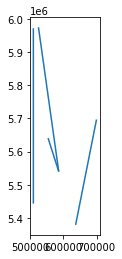

In [297]:
powerlines.plot()

Combine both in a plot and save

<Figure size 432x288 with 0 Axes>

<Figure size 432x576 with 0 Axes>

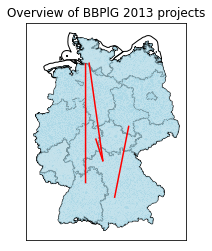

In [298]:
plt.figure(facecolor='white')
plt.figure(figsize=(6,8))
fig, ax = plt.subplots()
ax.set_aspect('equal')
states.plot(ax=ax, color='None', edgecolor='black')
municipalities.plot(ax=ax, color='lightblue')
powerlines.plot(ax=ax, color='red', markersize=1)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Overview of BBPlG 2013 projects')
plt.savefig(f'{path}/figures/BBPLG2013_projects.png', dpi=600)


Now construct the treatment indicator by checking if any of the power lines intersect with municipality polygons

In [299]:
municipalities.insert(loc=len(municipalities.columns), column='treated_0', value=0)
for i in range(len(municipalities)):
    municipalities['treated_0'].loc[municipalities.index[i]] = any(powerlines['geometry'].intersects(municipalities['geometry'].values[i]))

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25097/430223065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipalities['treated_0'].loc[municipalities.index[i]] = any(powerlines['geometry'].intersects(municipalities['geometry'].values[i]))


Plot the municipalities that intersect with a powerline

<Figure size 432x288 with 0 Axes>

<Figure size 432x576 with 0 Axes>

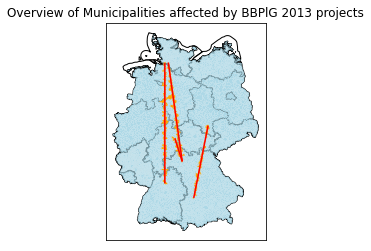

In [300]:
municipalities_intersected = municipalities[municipalities['treated_0'] == True] #drops all untreated munipalities
plt.figure(facecolor='white')
plt.figure(figsize=(6,8))
fig, ax = plt.subplots()
ax.set_aspect('equal')
states.plot(ax=ax, color='None', edgecolor='black')
municipalities.plot(ax=ax, color='lightblue')
municipalities_intersected.plot(ax=ax, color='orange')
powerlines.plot(ax=ax, color='red', markersize=1)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Overview of Municipalities affected by BBPlG 2013 projects')
plt.savefig(f'{path}/figures/BBPLG2013_treated_0.png', dpi=600)


Create buffers around the straight lines to create treatment indicator for different corridor widths

In [301]:
for buffer in (5, 10, 15, 25, 50):
    try:
        powerlines.insert(loc=len(powerlines.columns), column=f'geometry_{buffer*2}', value=0) #buffer is added on both sides -> x2 to simplify
    except Exception:
        pass
    powerlines[f'geometry_{buffer*2}'] = powerlines['geometry'].buffer(buffer*1000)
powerlines.head()

,# BBPlG 20,Start,End,New,Retro,geometry,geometry_10,geometry_20,geometry_30,geometry_50,geometry_100
0,3,Brunsbüttel,Großgartach,1,0,"LINESTRING (509169.440 5972099.313, 509180.155...","POLYGON ((514180.155 5443309.268, 514156.089 5...","POLYGON ((519180.155 5443309.369, 519132.023 5...","POLYGON ((524180.155 5443309.470, 524107.956 5...","POLYGON ((534180.155 5443309.673, 534059.823 5...","POLYGON ((559180.155 5443310.180, 558939.491 5..."
1,4,Wilster,Grafenrheinfeld,1,0,"LINESTRING (524519.730 5975050.664, 585751.695...","POLYGON ((590702.910 5540628.600, 590747.363 5...","POLYGON ((595654.125 5541325.358, 595743.030 5...","POLYGON ((600605.340 5542022.116, 600738.698 5...","POLYGON ((610507.769 5543415.632, 610730.033 5...","POLYGON ((635263.843 5546899.423, 635708.371 5..."
2,5,Bad Lauchstädt,Meitingen,1,0,"LINESTRING (699592.896 5696894.010, 636525.563...","POLYGON ((641429.928 5378112.459, 641310.917 5...","POLYGON ((646334.293 5377139.214, 646096.272 5...","POLYGON ((651238.658 5376165.970, 650881.626 5...","POLYGON ((661047.387 5374219.481, 660452.335 5...","POLYGON ((685569.212 5369353.258, 684379.107 5..."
3,17,Mecklar,Grafenrheinfeld,1,0,"LINESTRING (553510.774 5640922.638, 585751.695...","POLYGON ((590514.857 5541452.462, 590640.968 5...","POLYGON ((595278.019 5542973.083, 595530.241 5...","POLYGON ((600041.181 5544493.704, 600419.514 5...","POLYGON ((609567.505 5547534.946, 610198.060 5...","POLYGON ((633383.315 5555138.052, 634644.425 5..."


Plot for inspection

<Figure size 432x288 with 0 Axes>

<Figure size 432x576 with 0 Axes>

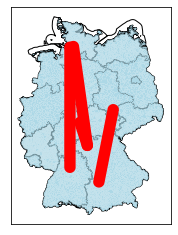

In [304]:
powerlines = powerlines.set_geometry('geometry_50')
plt.figure(facecolor='white')
plt.figure(figsize=(6,8))
fig, ax = plt.subplots()
ax.set_aspect('equal')
states.plot(ax=ax, color='None', edgecolor='black')
municipalities.plot(ax=ax, color='lightblue')
powerlines.plot(ax=ax, color='red', markersize=1)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

Now generate treatment indicators for all buffer sizes

In [305]:
for buffer in (5, 10, 15, 25, 50):
    try:
        municipalities.insert(loc=len(municipalities.columns), column=f'treated_{buffer*2}', value=0)
    except Exception:
        pass
    for i in range(len(municipalities)):
        municipalities[f'treated_{buffer*2}'].loc[municipalities.index[i]] = any(powerlines[f'geometry_{buffer*2}'].intersects(municipalities['geometry'].values[i]))
municipalities.head()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25097/690248357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipalities[f'treated_{buffer*2}'].loc[municipalities.index[i]] = any(powerlines[f'geometry_{buffer*2}'].intersects(municipalities['geometry'].values[i]))
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25097/690248357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipalities[f'treated_{buffer*2}'].loc[municipalities.index[i]] = any(powerlines[f'geometry_{buffer*2}'].intersects(municipalities['geometry'].values[i]))
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykern

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,WSK,EWZ,DEBKG_ID,geometry,treated_0,treated_10,treated_20,treated_30,treated_50,treated_100
0,6,2,1,083355004002,08335002,083355004002,Allensbach,Gemeinde,64,gemeinschaftsangehörig,...,2009-01-01,0,DEBKGDL20000HKND,"POLYGON ((507883.567 5282624.777, 507923.277 5...",False,False,False,False,False,False
1,6,2,1,083355004066,08335066,083355004066,Reichenau,Gemeinde,64,gemeinschaftsangehörig,...,2009-01-01,0,DEBKGDL20000HKNF,"MULTIPOLYGON (((508095.875 5281959.799, 508134...",False,False,False,False,False,False
2,6,2,1,083350063063,08335063,083350063063,Radolfzell am Bodensee,Stadt,61,None,...,2009-01-01,0,DEBKGDL20000HKNE,"POLYGON ((500719.668 5285290.972, 500632.566 5...",False,False,False,False,False,False
3,6,2,1,010595990186,01059186,010595990186,Steinbergkirche,Gemeinde,64,gemeinschaftsangehörig,...,2013-03-01,0,DEBKGDL20000XYFA,"POLYGON ((547082.162 6075557.922, 547528.602 6...",False,False,False,False,False,False
4,6,2,1,033595407018,03359018,033595407018,Freiburg (Elbe),Gemeinde,64,gemeinschaftsangehörig,...,2009-01-01,0,DEBKGDL20000QMG4,"POLYGON ((517934.141 5968832.380, 519053.640 5...",False,True,True,True,True,True


Plot for inspection

<Figure size 432x288 with 0 Axes>

<Figure size 432x576 with 0 Axes>

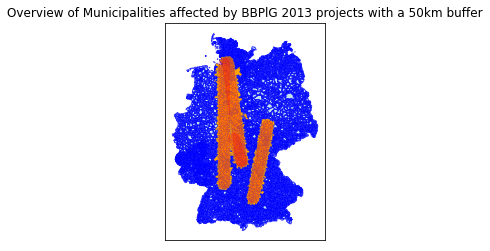

In [316]:
municipalities_intersected50 = municipalities[municipalities['treated_50'] == True] #drops all untreated munipalities
plt.figure(facecolor='white')
plt.figure(figsize=(6,8))
fig, ax = plt.subplots()
ax.set_aspect('equal')
states.plot(ax=ax, color='None', edgecolor='green', alpha=0)
municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', alpha=0.7)
municipalities_intersected50.plot(ax=ax, color='orange')
powerlines.plot(ax=ax, color='red', markersize=1, alpha=0.3)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Overview of Municipalities affected by BBPlG 2013 projects with a 50km buffer')
plt.savefig(f'{path}/figures/BBPLG2013_treated_50.png', dpi=600)


Export treatment dataset from municipalities gpd dataframe

In [ ]:
treatment = pd.DataFrame(municipalities)
treatment = treatment.reindex(columns=['AGS', 'GEN', 'treated_0'])
treatment.head()

,AGS,GEN,treated_0
0,08335002,Allensbach,False
1,08335066,Reichenau,False
2,08335063,Radolfzell am Bodensee,False
3,01059186,Steinbergkirche,False
4,03359018,Freiburg (Elbe),False
